In [8]:
import tensorflow as tf
from tensorflow import keras as K

import numpy as np
import matplotlib.pyplot as plt

In [9]:
tf.__version__

'1.10.0'

In [10]:
fashion_mnist = K.datasets.fashion_mnist

(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [14]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [20]:
train_X = train_X / 255.0

test_X = test_X / 255.0

In [22]:
input_shape = train_X.shape[1:]

In [23]:
input_shape

(28, 28)

Text(0.5, 0, 'Ankle boot')

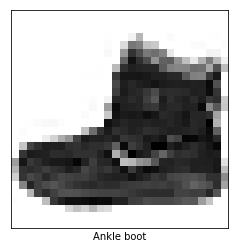

In [21]:
i = 0 # image index

plt.figure()
plt.imshow(train_X[i], cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.xlabel(class_names[train_Y[i]])

In [24]:
model = K.Sequential([
    K.layers.Flatten(input_shape=input_shape),
    K.layers.Dense(128, activation=tf.nn.relu),
    K.layers.Dense(10, activation=tf.nn.softmax)
])

In [25]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
model.fit(train_X, train_Y, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 7s 111us/step - loss: 0.4985 - acc: 0.8258
Epoch 2/5
60000/60000 [==============================] - 4s 66us/step - loss: 0.3761 - acc: 0.8639
Epoch 3/5
60000/60000 [==============================] - 4s 67us/step - loss: 0.3369 - acc: 0.8780
Epoch 4/5
60000/60000 [==============================] - 4s 66us/step - loss: 0.3145 - acc: 0.8857
Epoch 5/5
60000/60000 [==============================] - 4s 66us/step - loss: 0.2962 - acc: 0.8909


In [27]:
test_loss, test_acc = model.evaluate(test_X, test_Y)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 37us/step
Test accuracy: 0.8729
